# INM430 - Tiny DS Project Progress Report


***

** Student Name: ** _Daniel Sikar_ 

** Project Title:** _Determining signal processing strategies to eliminate Flame Detector analogue signal noise generated by GHz frequency interference_

***




## Part-1: Data source and domain description (maximum 150 words):



**Data source:** Flame detector logs. 

**Domain description:** Flame detectors are widely used in areas subject to fire hazards such as oil and gas installations and chemical plants. Detectors consist of hardware and software subject to SIL (Security Integrity Level) certification, aiming and reducing risk effects. Standards such as the [IEC 61508](https://en.wikipedia.org/wiki/IEC_61508) are used to certify equipment and ensure compliance.

**What I want to demonstrate**

In this analysis I aim to apply techniques discussed so far, as well as the python data processing and analysis ecosystem to visualise RF (radio frequency) noise generated by e.g. wifi routers in flame detection equipment

**What I want to achieve**

By demonstrating visualy where noise is detected, I would then aim to use python smoothing algorithms, or if they do not exist in python libraries write them myself, to eliminated noise. As a side effect, I would like to use FFT (Fast fourier transform) techniques to determine which frequencies generated the noise.



## Part-2: Analysis Strategy and Plans (maximum 200 words):

The data in the flame detector log files in identified by lines containing 12 hexadecimal digits (6 columns of 1 byte), containing 6 unsigned byte values ranging from 0 to 255. Each reading is taken in 10ms intervals. A flame is reported by software if the average analogue reading from any two of the 3 detectors (FlameA, FlameB and Guard) report values above a given threshold for a given period of time (TBA).


1. Processing data

Read Flame Data file (Log45.log) and RF interference file (Log48.log) obtaining AD (analogue to digital) values

2. Visualing data

Plots are created using the matplotlib.pyplot library

3. Visualing flame (barbecue lighter) and RF interference

Flame data is expected to be irregular, RF interference is expected to be regular

4. Creating signal processing rules

Based on visualisation results, rules are to be inferred to create filtering algorightms to remove RF noise

**(Nice to have)**

5. Using numpy Fast Fourier Transform algorithms to determine which GHz frequencies generated the  RF noise.



## Part-3: Initial investigations on the data sources (maximum 150 words): 

We loaded our Barbecue lighter data, starting with Flame A, noticing the flame pattern disturbance but also that plot figure could do with increasing to allow for better data visualisation, we then added Flame B and Guard data.

We noticed that for most parts, data was not expressive so we zoomed in our area of interested, by slicing the numpy arrays where data is held.

We then noticed the flame disturbance pattern, as expected, is irregular by nature.

We then repeated all the steps described above, but this time with RF interference data, noticing, as expected, that it is regular by nature, and that FlameA and FlameB detector AD conversion readings do not overlap as closely as with flame pattern disturbances, giving us a basis for writing a signal processing algorithm.


## Part-4: Python code for initial investigations

In [2]:
# This cell is where you can copy + paste your Python code which loads your data and produces 
# When you press CTRL+Enter, this cell will execute and produce some output
# You can develop your code in Spyder (or another IDE) and copy + paste over here

# Step-1: Load your data
# Step-2: Get an overview of the data features, some suggestions to look for:
#         number of features, data types, any missing values?, 
#         any transformations needed?

# Start with your import (s) here.

# The following is essential to get your matplotlib plots inline, so do not miss this one if you have graphics.

%matplotlib inline

# Some usual imports here
import csv as csv 
import numpy as np
# no pandas used so far
# import pandas as pd

### Import data

Our data is in hexadecimal format so for starters we will convert to comma separated integers, save csv files and work with csv thereafter

In [3]:
######################################
### PROCESS LIGHTER FLAME LOG FILE ###
######################################

# vars
# expected record length
iRecLen = 12
# lists of values
iFA = []
iFB = []
iG= []

logfilename = "data/Test45.log"
file = open(logfilename, "r")
for line in file:
    line = line.rstrip()
    if(len(line) == iRecLen):
        # FlameA, FlameB and Guard detector analogue readings
        iFA.append(int(line[0:2], 16))
        iFB.append(int(line[2:4], 16))
        iG.append(int(line[4:6], 16))
        
# Lighter flame data lists converted to numpy arrays
iFAlfd = np.asarray(iFA)
iFBlfd = np.asarray(iFB)
iGlfd = np.asarray(iG) 

# Create index array for our x axis time series
iIdx = np.arange(1, iGlfd.size + 1, 1)
print("LIGHTER FLAME DATA")
print("FlameA array size = " + str(iFAlfd.size))
print("FlameB array size = " + str(iFBlfd.size))
print("Guard array size = " + str(iGlfd.size))
print("Index iIdx count = " + str(iIdx.size))

LIGHTER FLAME DATA
FlameA array size = 6032
FlameB array size = 6032
Guard array size = 6032
Index iIdx count = 6032


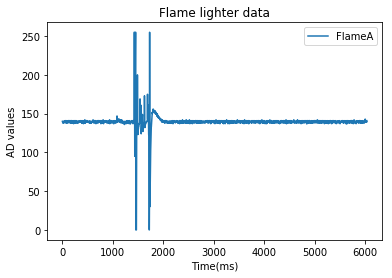

In [4]:
# Now let's have a look at this data
# We know that analogue readings are acquired every 10ms so that gives us the base of our time series on the X axis
# We also know that data is represented as an unsigned byte ranging from 0 to 255 
# giving us the interval for our Y axis
# First we look at Flame A detector for our barbecue lighter data using pyplot from matplotlib
import matplotlib.pyplot as plt
plt.clf()
plt.plot(iIdx, iFAlfd, label='FlameA')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("Flame lighter data")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

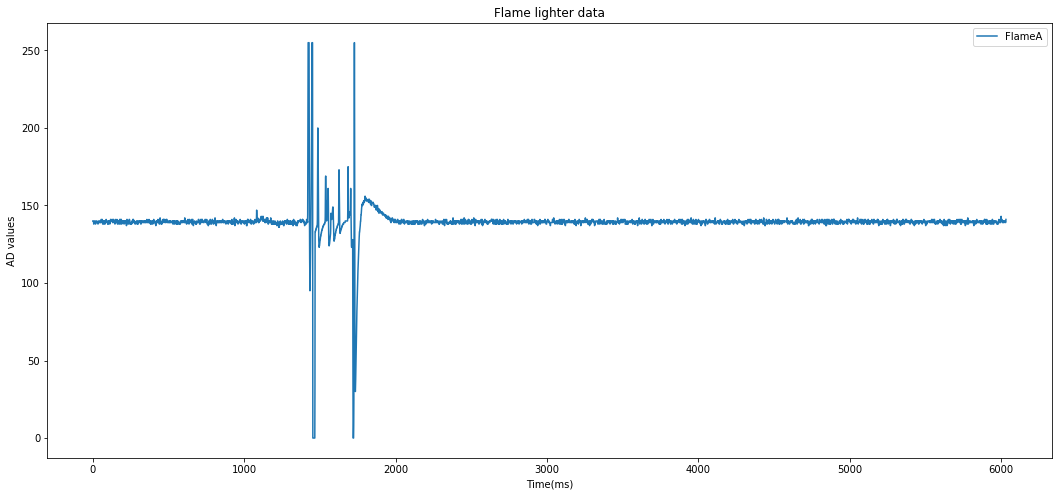

In [5]:
# let's stretch out the x axis to better visualise data using figure figsize argument
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx, iFAlfd, label='FlameA')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("Flame lighter data")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

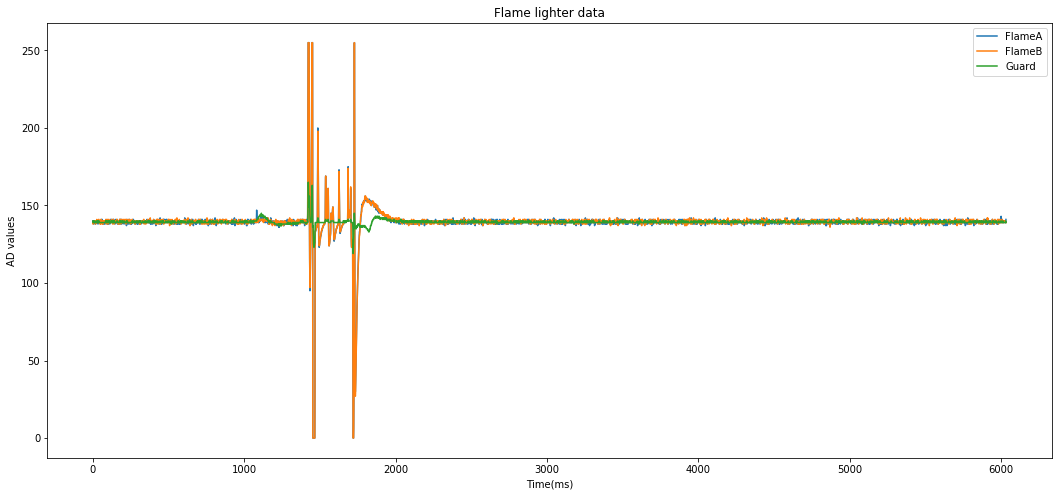

In [6]:
# That basically suggests barbecue lighter was lit somewhere after the 1000ms mark up and extinguished 
# somewhere near the 2000ms mark.
# Now let's superimpose FlameB and Guard to further visualise our data
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx, iFAlfd, label='FlameA')
plt.plot(iIdx, iFBlfd, label='FlameB')
plt.plot(iIdx, iGlfd, label='Guard')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("Flame lighter data")
plt.legend()
plt.show()

In [7]:
# We see that FlameA and FlameB are providing very similar readings with minor sections of no overlap (around 1000ms)
# Since the area of interest is between 1000ms and 2000ms, it makes sense to discard the rest of our data and focus
# on the area of interest, "zooming in" so to speak
# Todo do so, we slice the arrays between 950ms and 2100ms, so index counter 950 to 2100
iFAlfd_sliced = iFAlfd[950:2100:1]
iFBlfd_sliced = iFBlfd[950:2100:1]
iGlfd_sliced = iGlfd[950:2100:1]
iIdx_sliced = np.arange(1, iGlfd_sliced.size + 1, 1)
# Let's look at our new array sizes
print("SLICED LIGHTER FLAME DATA")
print("FlameA sliced array size = " + str(iFAlfd_sliced.size))
print("FlameB sliced array size = " + str(iFBlfd_sliced.size))
print("Guard sliced array size = " + str(iGlfd_sliced.size))
print("Index sliced iIdx count = " + str(iIdx_sliced.size))

SLICED LIGHTER FLAME DATA
FlameA sliced array size = 1150
FlameB sliced array size = 1150
Guard sliced array size = 1150
Index sliced iIdx count = 1150


<Figure size 432x288 with 0 Axes>

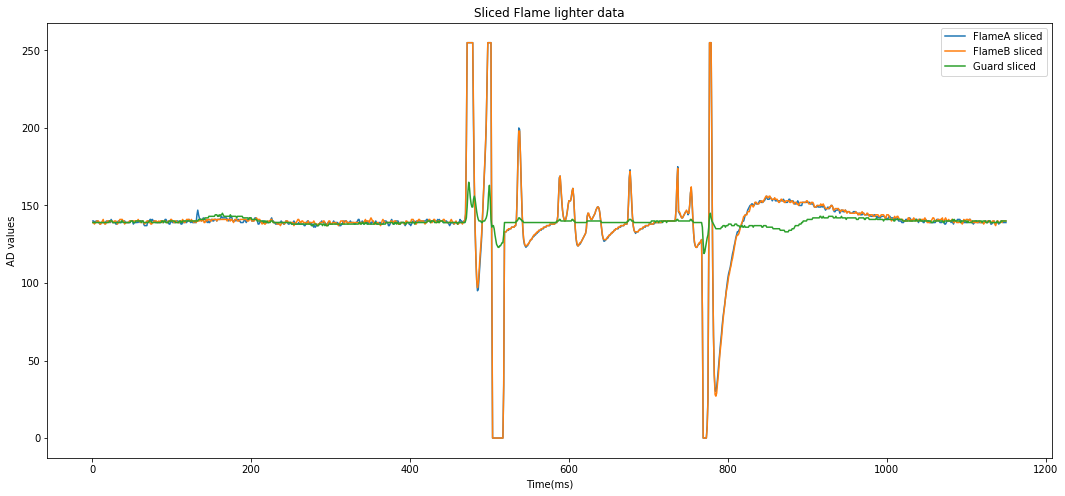

In [8]:
# Now we plot our sliced data
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx_sliced, iFAlfd_sliced, label='FlameA sliced')
plt.plot(iIdx_sliced, iFBlfd_sliced, label='FlameB sliced')
plt.plot(iIdx_sliced, iGlfd_sliced, label='Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("Sliced Flame lighter data")
plt.legend()
plt.show()

In [9]:
# This is the picture we need, which characterises flame data as being irregular, now we move onto RF data

########################################
### PROCESS RF INTERFERENCE LOG FILE ###
########################################

# Note, we are reusing variable names to process the second file
# vars
# expected record length
iRecLen = 12
# lists of values
iFA = []
iFB = []
iG= []

logfilename = "data/Test48.log"
file = open(logfilename, "r")
for line in file:
    line = line.rstrip()
    if(len(line) == iRecLen):
        # FlameA, FlameB and Guard detector analogue readings
        iFA.append(int(line[0:2], 16))
        iFB.append(int(line[2:4], 16))
        iG.append(int(line[4:6], 16))
        
# Lighter flame data lists converted to numpy arrays
iFArfd = np.asarray(iFA)
iFBrfd = np.asarray(iFB)
iGrfd = np.asarray(iG) 

# Create index array for our x axis time series
iIdx = np.arange(1, iGrfd.size + 1, 1)
print("RF INTERFERENCE DATA")
print("FlameA array size = " + str(iFArfd.size))
print("FlameB array size = " + str(iFBrfd.size))
print("Guard array size = " + str(iGrfd.size))
print("Index iIdx count = " + str(iIdx.size))

RF INTERFERENCE DATA
FlameA array size = 29096
FlameB array size = 29096
Guard array size = 29096
Index iIdx count = 29096


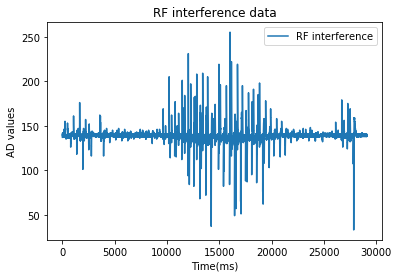

In [10]:
# Now now we look at the data, which like flame data, is acquired every 10ms 
# so that gives us the same base for our time series on the X axis
# The data is also represented as an unsigned byte ranging from 0 to 255 
# giving us the interval for our Y axis
# First we look at Flame A detector for our RF data using again pyplot from matplotlib
plt.clf()
plt.plot(iIdx, iFArfd, label='RF interference FlameA')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference data")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

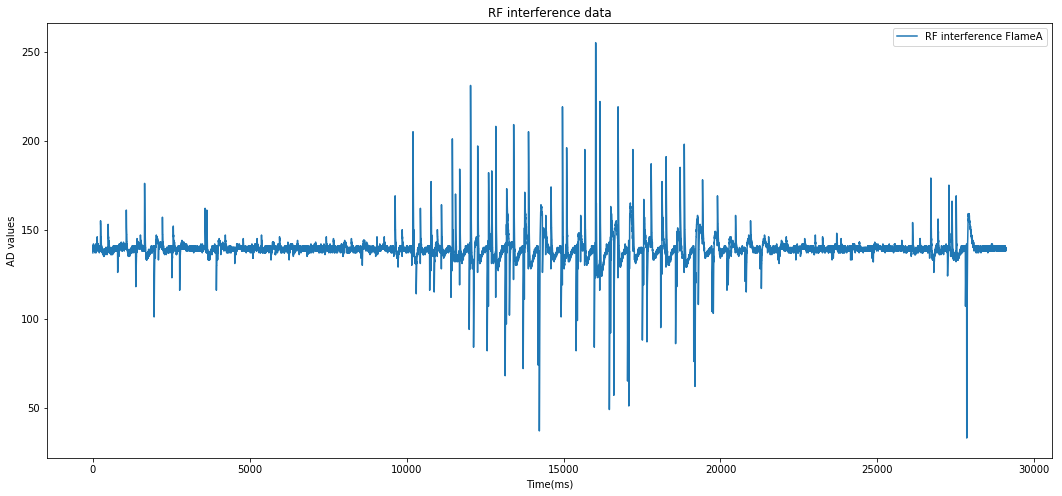

In [12]:
# let's stretch out the x axis, like we did with Lighter Flame data, to better visualise data using figure figsize argument
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx, iFArfd, label='RF interference FlameA')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference data")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

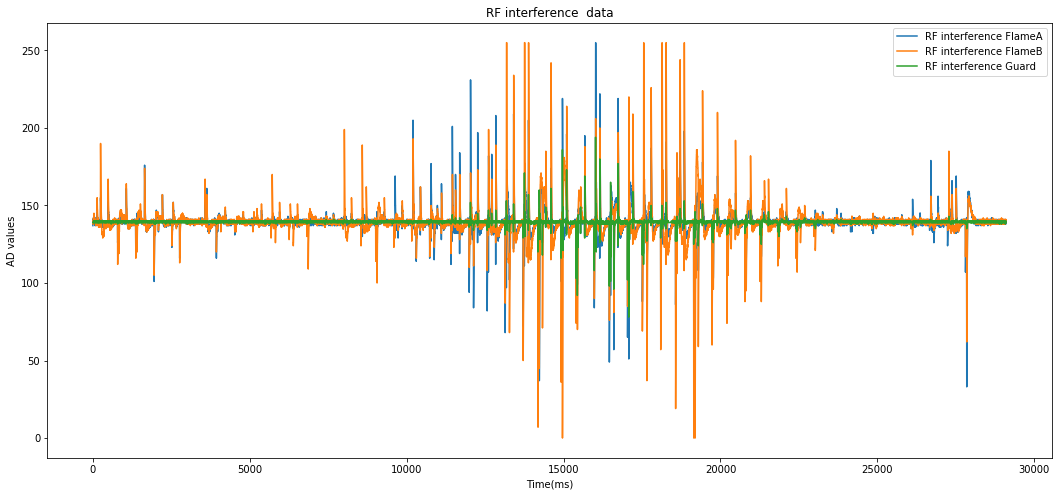

In [13]:
# We can see the interference patterns, now let's superimpose RF interference data for FlameB and Guard
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx, iFArfd, label='RF interference FlameA')
plt.plot(iIdx, iFBrfd, label='RF interference FlameB')
plt.plot(iIdx, iGrfd, label='RF interference Guard')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference  data")
plt.legend()
plt.show()

In [17]:
# We start seeing one interesting pattern here, unlike the Barbecue Lighter flame data, Flame A and Flame B show
# less overlap which ultimately could provide a marker for RF interference
# Now we zoom in, expecting to see, unlike the irregular patter of the real flame, a regular pattern of interference
# Well choose indexes between 14500 and 15650, to show areas of interest where FlameA and FlameB overlap as well as 
# where they do not overlap.
# This time we use variables, which is better practice than "magic" numbers
iIdxStart = 14500
iIdxEnd = 15650
iFArfd_sliced = iFArfd[iIdxStart:iIdxEnd:1]
iFBrfd_sliced = iFBrfd[iIdxStart:iIdxEnd:1]
iGrfd_sliced = iGrfd[iIdxStart:iIdxEnd:1]
iIdx_sliced = np.arange(1, iGrfd_sliced.size + 1, 1)
# Let's look at our new array sizes
print("SLICED LIGHTER FLAME DATA")
print("FlameA sliced array size = " + str(iFArfd_sliced.size))
print("FlameB sliced array size = " + str(iFBrfd_sliced.size))
print("Guard sliced array size = " + str(iGrfd_sliced.size))
print("Index sliced iIdx count = " + str(iIdx_sliced.size))

SLICED LIGHTER FLAME DATA
FlameA sliced array size = 1150
FlameB sliced array size = 1150
Guard sliced array size = 1150
Index sliced iIdx count = 1150


<Figure size 432x288 with 0 Axes>

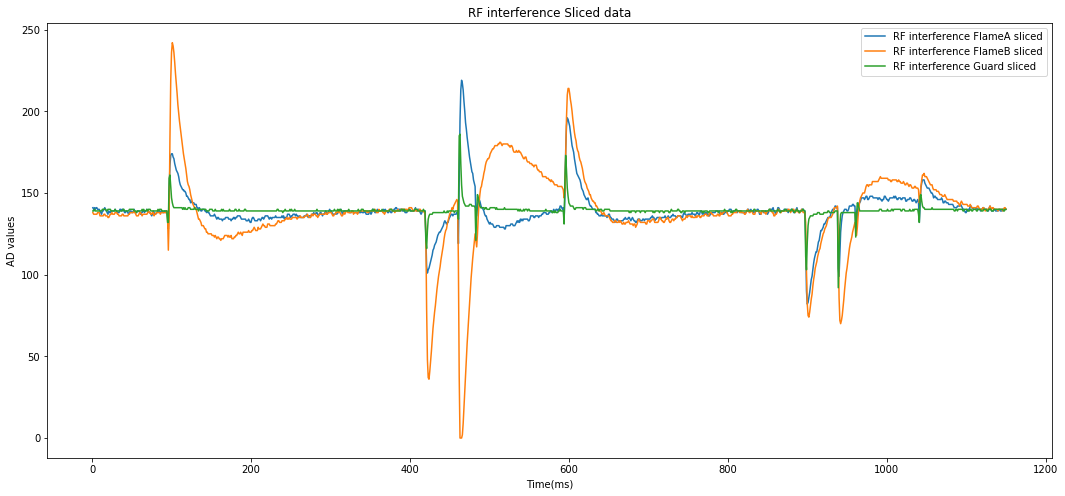

In [18]:
# Now we plot our RF interference sliced data
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx_sliced, iFArfd_sliced, label='RF interference FlameA sliced')
plt.plot(iIdx_sliced, iFBrfd_sliced, label='RF interference FlameB sliced')
plt.plot(iIdx_sliced, iGrfd_sliced, label='RF interference Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference Sliced data")
plt.legend()
plt.show()

In [ ]:
# Here we see, as expected, that RF interference data is regular and that FlameA and FlameB do not overlap, 
# forming a basis where rules can be extracted in writing our signal processing algorithm, to filter out RF interference
# that is as far as we got for the progress report. 
